In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import yt
plt.style.use('default')

import sys
sys.path.append("/cluster/home/yhgong/")

from python.modules.features.calculate_data.utilities.turbulence_heating_vazza import *

In [3]:
simFile = SimFileModel(
    simPath="/lfs/data/yhgong/productionRun/mergerAGN/MHD/Cooling_Feedback_ContiRandom15",
    hdf5FilePrefix="perseus_merger_hdf5_plt_cnt",
    fileSterMyr=1
)

In [4]:
result = TurbulenceHeatingVazza().setInputs(
        mode=TurbulenceHeatingVazzaMode.TurbVel,
        simFile=simFile,
        calculationInfo=TurbulenceHeatingVazzaCalculationInfoModel(
            timeMyr=3000,
            rBoxKpc=75,
            bulkTurbFilteringMaxScale=40
        )
    ).getData2d("z")


yt : [INFO     ] 2024-05-10 16:35:51,618 Particle file found: perseus_merger_hdf5_part_3000


yt : [INFO     ] 2024-05-10 16:35:51,685 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-10 16:35:51,687 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-10 16:35:51,688 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-10 16:35:51,689 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-10 16:35:51,690 Parameters: cosmological_simulation   = 0
IDL 8.8.0 (linux x86_64 m64).
(c) 2020, Harris Geospatial Solutions, Inc.

Licensed for use by: National Tsing Hua University
License: 351191


       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40
       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40
       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40


yt : [INFO     ] 2024-05-10 16:36:24,084 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-10 16:36:24,152 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-10 16:36:24,153 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-10 16:36:24,155 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-10 16:36:24,156 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-10 16:36:24,157 Parameters: cosmological_simulation   = 0


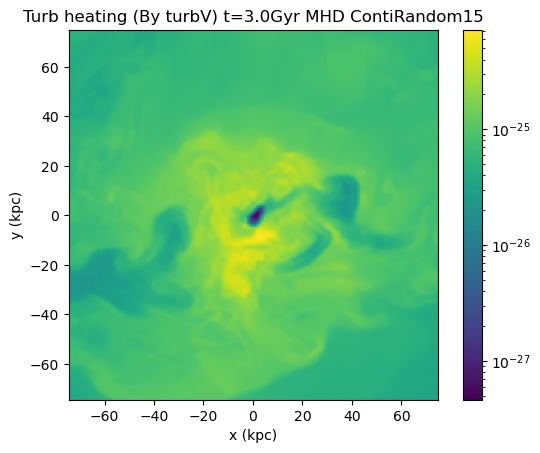

In [6]:
# Updated
from matplotlib import colors

axisUnit = result.horizontalAxis[1].unit.to_string()
plt.imshow(
    np.flipud(result.heating.value), 
    norm=colors.LogNorm(),
    extent=[
        result.horizontalAxis[1].value[0], result.horizontalAxis[1].value[-1],
        result.verticalAxis[1].value[0], result.verticalAxis[1].value[-1],
    ]
)
plt.colorbar()
plt.title("Turb heating (By turbV) t=3.0Gyr MHD ContiRandom15")
plt.xlabel(f"{result.horizontalAxis[0]} ({axisUnit})")
plt.ylabel(f"{result.verticalAxis[0]} ({axisUnit})")
plt.show()